# Análisis Exploratorio de Datos
## Univariado, Bivariado, Multivariado

**1. Análisis Univariado**
* Edad de los jugadores
* Peso de los jugadores
* Altura de los jugadores
* Distribución de roles
* Equipos de fútbol
* Rol Jugador

**2. Análisis Bivariado**
* Relación entre la altura y el peso
* Relación entre la edad y el peso

**3. Análisis Multivariado**
* Relación entre edad, peso y altura en función del rol del jugador

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'https://raw.githubusercontent.com/restevesd/DataCleaning/main/ligapro2020.csv'
df = pd.read_csv(file_path, sep=';')

df.head()


,nacimientojugador,edadjugador,pesojugador,alturajugador,roljugador,paisjugador,idJugador,jugadoresequipo,idequipo,nombreequipo
0,1995-01-24,25,NaN,188.0,Arquero,Ecuador,132021,35,216,Aucas
1,2002-03-22,18,81.0,185.0,Arquero,Ecuador,246964,35,216,Aucas
2,1978-07-01,42,86.0,187.0,Arquero,Colombia,3837,35,216,Aucas
3,1985-06-02,35,80.0,189.0,Arquero,Uruguay,8588,35,216,Aucas
4,1999-02-28,21,82.0,188.0,Arquero,Ecuador,214039,35,216,Aucas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nacimientojugador  516 non-null    object 
 1   edadjugador        516 non-null    object 
 2   pesojugador        404 non-null    float64
 3   alturajugador      411 non-null    float64
 4   roljugador         516 non-null    object 
 5   paisjugador        516 non-null    object 
 6   idJugador          516 non-null    int64  
 7   jugadoresequipo    516 non-null    int64  
 8   idequipo           516 non-null    int64  
 9   nombreequipo       516 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 40.4+ KB


In [ ]:
df['edadjugador'] = pd.to_numeric(df['edadjugador'], errors='coerce')
df['pesojugador'] = pd.to_numeric(df['pesojugador'], errors='coerce')
df['alturajugador'] = pd.to_numeric(df['alturajugador'], errors='coerce')
df['jugadoresequipo'] = pd.to_numeric(df['jugadoresequipo'], errors='coerce')

El parámetro errors='coerce' en la función pd.to_numeric() se utiliza para manejar los valores no numéricos durante la conversión de una serie a tipo numérico.

En este contexto se asegura de que cualquier valor no convertible se convierta a NaN, lo cual es útil para manejar datos corruptos o faltantes sin interrumpir el flujo de trabajo con errores.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nacimientojugador  516 non-null    object 
 1   edadjugador        286 non-null    float64
 2   pesojugador        404 non-null    float64
 3   alturajugador      411 non-null    float64
 4   roljugador         516 non-null    object 
 5   paisjugador        516 non-null    object 
 6   idJugador          516 non-null    int64  
 7   jugadoresequipo    516 non-null    int64  
 8   idequipo           516 non-null    int64  
 9   nombreequipo       516 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 40.4+ KB


In [ ]:
df['roljugador'].value_counts()

roljugador
Volante      205
Defensor     148
Delantero     91
Arquero       54
DT            18
Name: count, dtype: int64

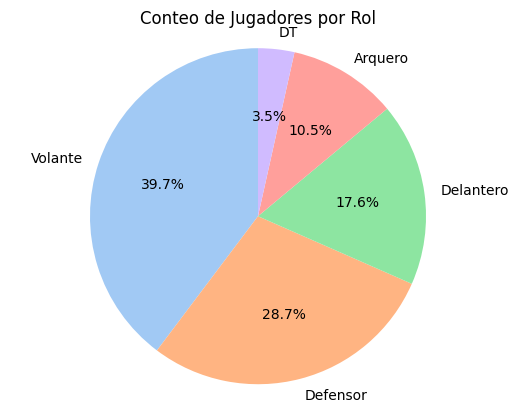

In [ ]:
# prompt: df['roljugador'].value_counts() con estos valores generar un gráfico de pie con seaborn

sns.set_palette('pastel')
labels = df['roljugador'].value_counts().index
sizes = df['roljugador'].value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Conteo de Jugadores por Rol')
plt.show()


In [ ]:
df = df[df["roljugador"] != "DT"] #no usamos los datos que en la columna rol sea DT

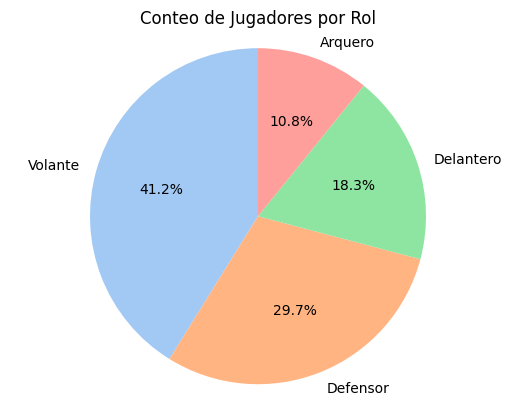

In [ ]:
sns.set_palette('pastel')
labels = df['roljugador'].value_counts().index
sizes = df['roljugador'].value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Conteo de Jugadores por Rol')
plt.show()


In [ ]:
df['nombreequipo'].value_counts()

nombreequipo
DeportivoCuenca          37
Olmedo                   35
Aucas                    34
LigadePortoviejo         34
Orense                   34
Barcelona                33
GuayaquilCity            31
IndependientedelValle    31
ElNacional               30
T?cnicoUniversitario     30
Emelec                   29
LigadeQuito              29
U.Cat?lica(E)            29
Delf?n                   28
Macar?                   28
MushucRuna               26
Name: count, dtype: int64

In [ ]:
# Get the value counts of the 'nombreequipo' column
equipo_counts = df['nombreequipo'].value_counts()
equipo_counts

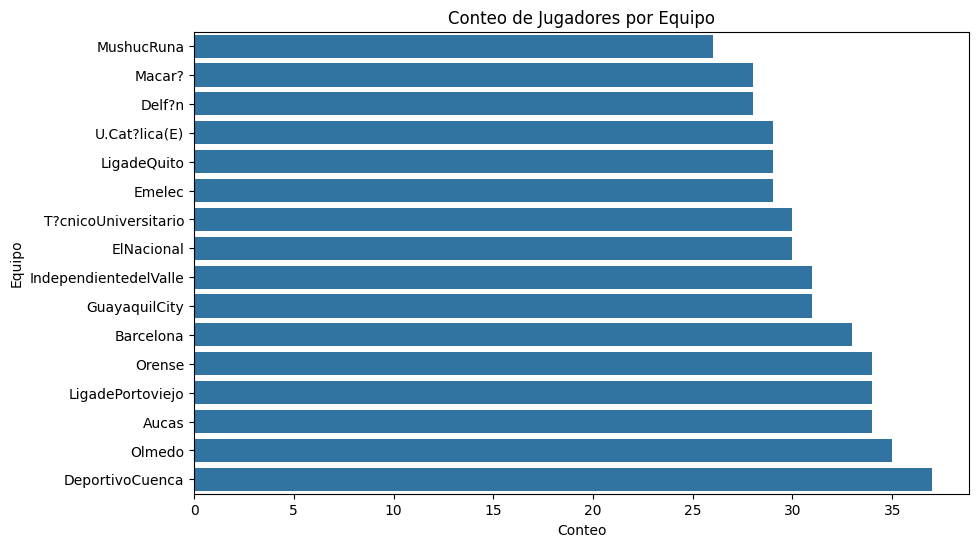

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Increase the width of the plot
sns.barplot(x=equipo_counts.values, y=equipo_counts.index)

# Invert the axes
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Conteo')
plt.ylabel('Equipo')
plt.title('Conteo de Jugadores por Equipo')

# Show the plot
plt.show()


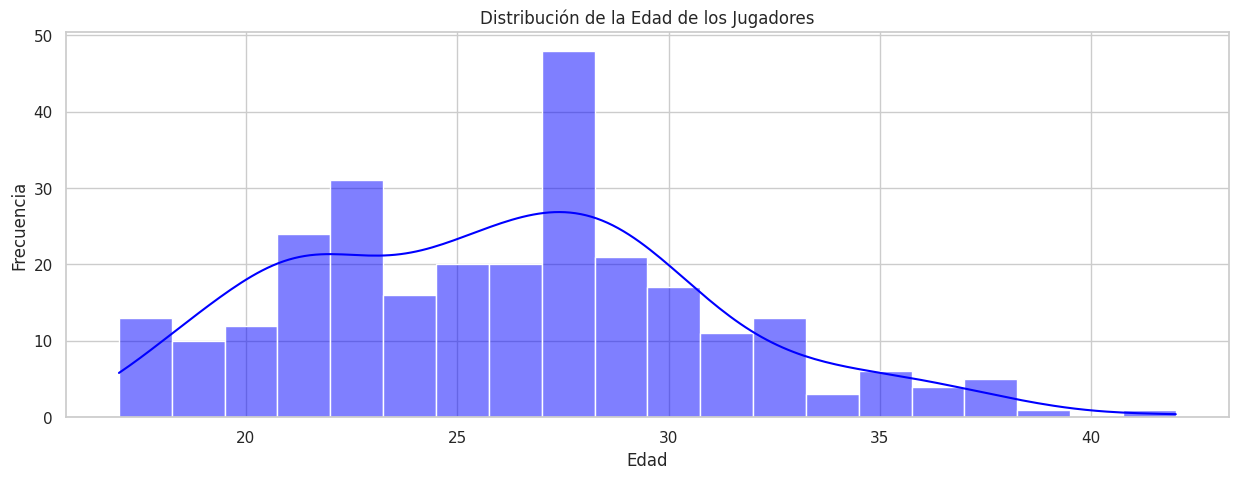

In [ ]:
# Configuración de estilo
sns.set(style="whitegrid")

# Análisis Univariado

# Distribución de la edad
plt.figure(figsize=(15, 5))
sns.histplot(df['edadjugador'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

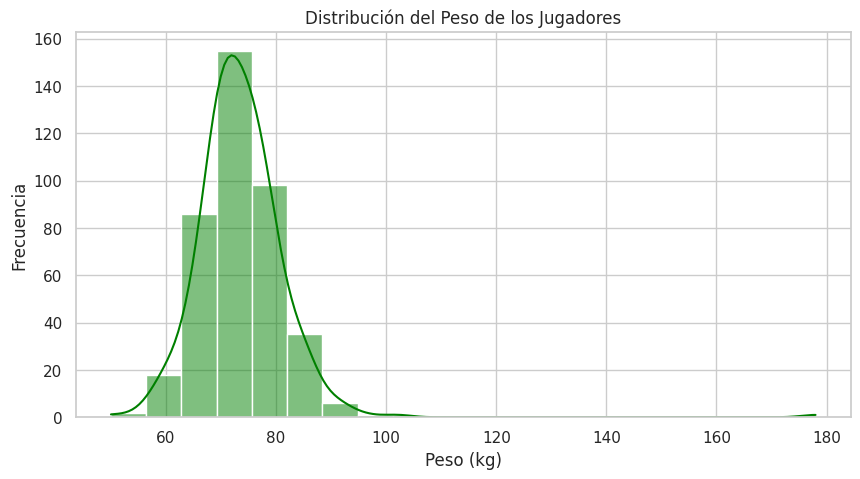

In [ ]:
# Distribución del peso
plt.figure(figsize=(10, 5))
sns.histplot(df['pesojugador'], kde=True, bins=20, color='green')
plt.title('Distribución del Peso de los Jugadores')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

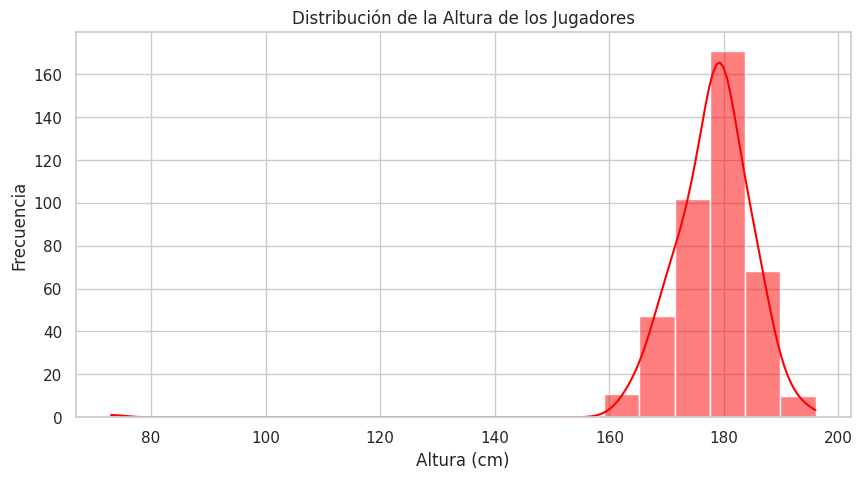

In [ ]:
# Distribución de la altura
plt.figure(figsize=(10, 5))
sns.histplot(df['alturajugador'], kde=True, bins=20, color='red')
plt.title('Distribución de la Altura de los Jugadores')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()


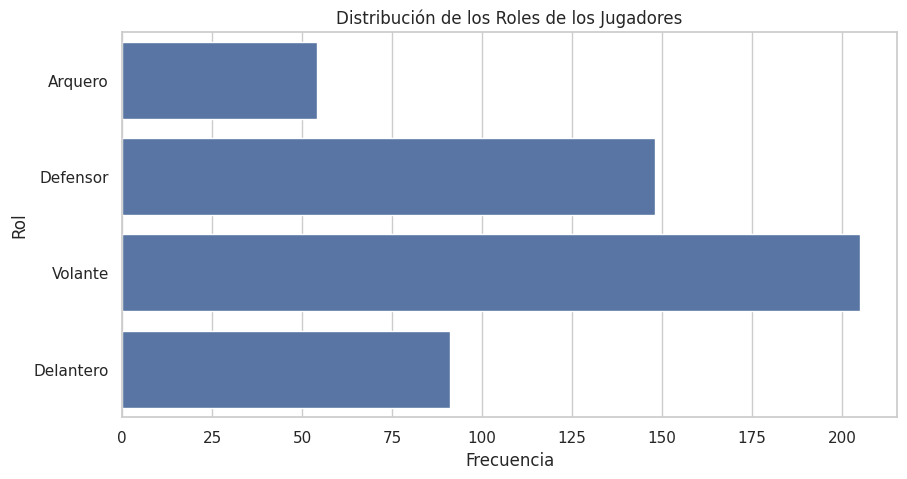

In [ ]:
# Distribución de los roles
plt.figure(figsize=(10, 5))
sns.countplot(y=df['roljugador'])
plt.title('Distribución de los Roles de los Jugadores')
plt.xlabel('Frecuencia')
plt.ylabel('Rol')
plt.show()

In [ ]:
df['roljugador'].value_counts()

roljugador
Volante      205
Defensor     148
Delantero     91
Arquero       54
Name: count, dtype: int64

In [ ]:
df['roljugador'].value_counts().index

Index(['Volante', 'Defensor', 'Delantero', 'Arquero'], dtype='object', name='roljugador')

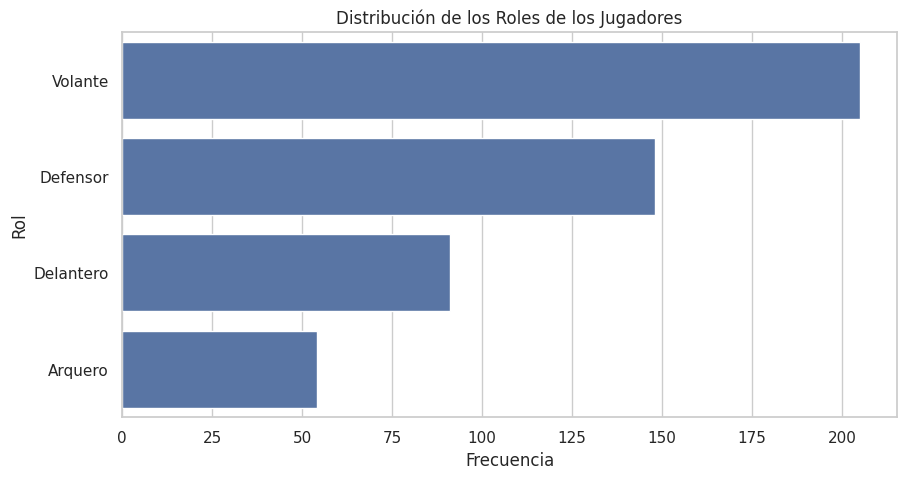

In [ ]:
# Distribución de los roles
plt.figure(figsize=(10, 5))
sns.countplot(y=df['roljugador'], order=df['roljugador'].value_counts().index)
plt.title('Distribución de los Roles de los Jugadores')
plt.xlabel('Frecuencia')
plt.ylabel('Rol')
plt.show()


1. Análisis Univariado
**Edad de los jugadores:** La mayoría de los jugadores tienen entre 20 y 30 años, con un pico alrededor de los 26-30 años.

**Peso de los jugadores:** El peso de los jugadores muestra una distribución bastante uniforme con algunos picos alrededor de los 70-80 kg.

**Altura de los jugadores:** La altura de los jugadores está centrada en torno a los 175-185 cm.

**Distribución de roles:** Los roles más comunes entre los jugadores son "Volante" y "Defensor".

# Análisis Bivariado

In [ ]:
import plotly.express as px

# Calculate the percentage of players per country and role
country_role_percentages = (
    df.groupby(['paisjugador', 'roljugador'])
    .size()
    .to_frame(name='count')
    .reset_index()
    .pivot(index='paisjugador', columns='roljugador', values='count')
    .apply(lambda x: x / x.sum() * 100, axis=1)
)

# Create a stacked bar chart using Plotly Express
fig = px.bar(country_role_percentages,
             title='Porcentaje de Jugadores por País y Rol',
             labels={'paisprocedencia': 'País', 'roljugador': 'Rol', 'value': '% Jugadores'},
             barmode='stack')

# Display the plot
fig.show()


In [ ]:
# Calculate the percentage of players per country and role
country_role_percentages = (
    df.groupby(['paisjugador', 'roljugador'])
    .size()
    .to_frame(name='count')
    .reset_index()
    .pivot(index='paisjugador', columns='roljugador', values='count')
    .apply(lambda x: x / x.sum() * 100, axis=1)
)

country_role_percentages

roljugador,Arquero,Defensor,Delantero,Volante
paisjugador,,,,
Argentina,11.475410,26.229508,22.950820,39.344262
Brasil,NaN,NaN,NaN,100.000000
Chile,NaN,NaN,100.000000,NaN
Colombia,6.250000,31.250000,25.000000,37.500000
Ecuador,11.139896,31.347150,15.544041,41.968912
Espa?a,NaN,NaN,50.000000,50.000000
EstadosUnidos,NaN,NaN,NaN,100.000000
Panam?,NaN,NaN,100.000000,NaN
Paraguay,NaN,33.333333,66.666667,NaN


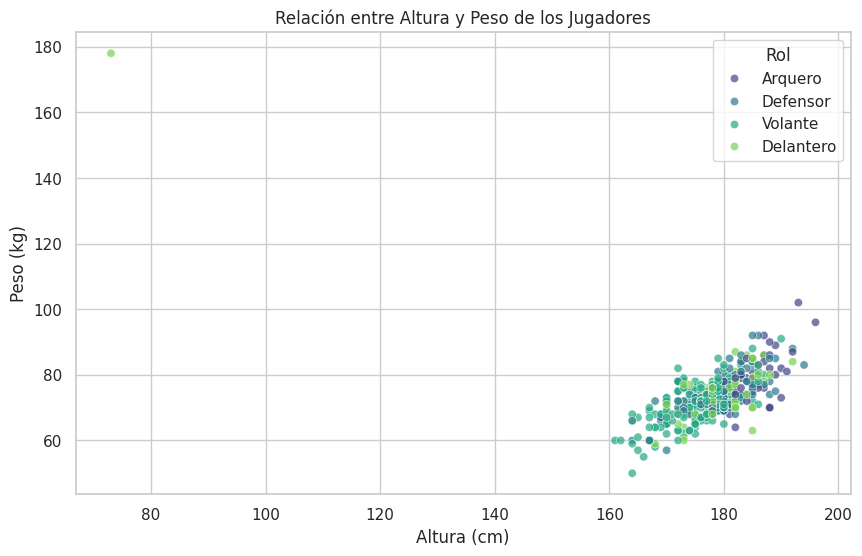

In [ ]:
# Relación entre altura y peso
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alturajugador', y='pesojugador', hue='roljugador', palette='viridis', alpha=0.7)
plt.title('Relación entre Altura y Peso de los Jugadores')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(title='Rol')
plt.show()

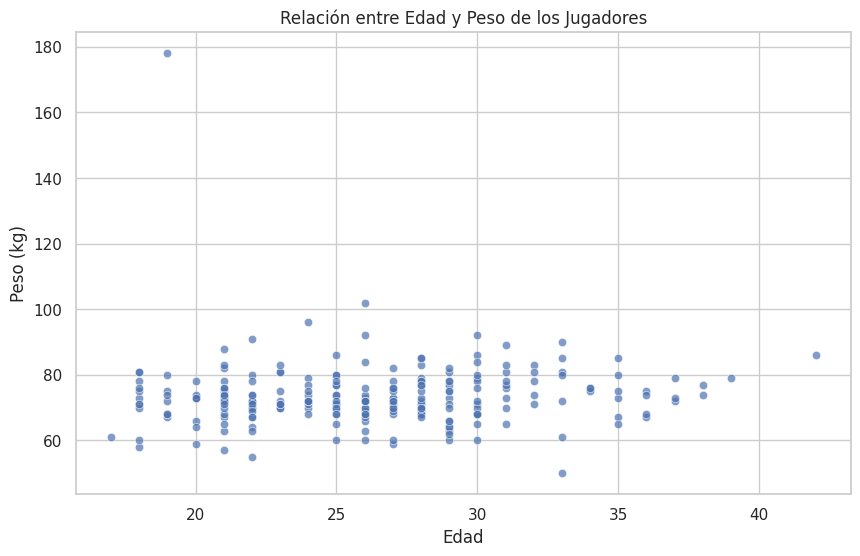

In [ ]:
# Relación entre edad y peso
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='edadjugador', y='pesojugador', alpha=0.7)
plt.title('Relación entre Edad y Peso de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Peso (kg)')
plt.show()

**Relación entre altura y peso:** Existe una correlación positiva entre la altura y el peso de los jugadores, lo cual es esperado. Los roles se distribuyen de manera similar a lo largo de esta relación.

**Relación entre edad y peso:** No se observa una relación clara entre la edad y el peso. Los jugadores de diferentes edades tienden a tener una amplia gama de pesos.

# Análisis Multivariado


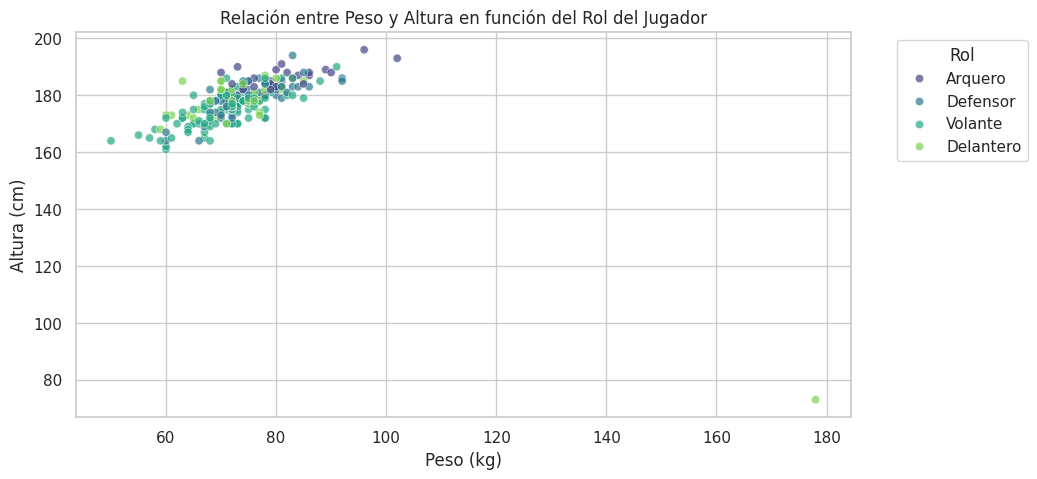

In [ ]:
# Relación entre peso y altura en función del rol del jugador
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_fecha, x='pesojugador', y='alturajugador', hue='roljugador', palette='viridis', alpha=0.7, sizes=(20, 200))
plt.title('Relación entre Peso y Altura en función del Rol del Jugador')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.legend(title='Rol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Distribución por Rol:**

**Arquero:** Los arqueros generalmente se encuentran en la parte superior del gráfico, lo que indica que tienden a ser más altos y más pesados en comparación con otros roles. Esto es lógico ya que la altura es una ventaja significativa para los arqueros.

**Defensores:** Los defensores también tienden a ser más altos y pesados, aunque no tanto como los arqueros. La altura y el peso son beneficiosos para los defensores para ganar duelos aéreos y en la fuerza física.

**Delanteros y Volante:** Los delanteros y mediocampistas muestran una mayor variabilidad en altura y peso. Hay delanteros y mediocampistas de diversas alturas y pesos, lo que sugiere que estos roles requieren una combinación de habilidades donde la altura y el peso no son tan determinantes como la agilidad y la velocidad.

# Merge, Concatenación y Pivote

1. **Merge (Fusión)**
El merge se utiliza para combinar dos DataFrames en base a una o más claves comunes.

2. **Concatenación**
La concatenación se utiliza para apilar DataFrames uno encima del otro o uno al lado del otro.

3. **Pivote**
El pivote transforma o "gira" los datos, reorganizando columnas y filas según sea necesario.

In [ ]:
# Crear el DataFrame adicional para merge
df_teams = pd.DataFrame({
    'idequipo': [216, 217, 218],
    'ciudad': ['Quito', 'Guayaquil', 'Cuenca'],
    'estadio': ['Estadio Aucas', 'Estadio Barcelona', 'Estadio Cuenca']
})

In [ ]:
df_teams

,idequipo,ciudad,estadio
0,216,Quito,Estadio Aucas
1,217,Guayaquil,Estadio Barcelona
2,218,Cuenca,Estadio Cuenca


In [ ]:
# Realizar el merge
merged_df = pd.merge(df, df_teams, on='idequipo', how='left')
merged_df

,nacimientojugador,edadjugador,pesojugador,alturajugador,roljugador,paisjugador,idJugador,jugadoresequipo,idequipo,nombreequipo,ciudad,estadio
0,1995-01-24,25,NaN,188.0,Arquero,Ecuador,132021,35,216,Aucas,Quito,Estadio Aucas
1,2002-03-22,18,81.0,185.0,Arquero,Ecuador,246964,35,216,Aucas,Quito,Estadio Aucas
2,1978-07-01,42,86.0,187.0,Arquero,Colombia,3837,35,216,Aucas,Quito,Estadio Aucas
3,1985-06-02,35,80.0,189.0,Arquero,Uruguay,8588,35,216,Aucas,Quito,Estadio Aucas
4,1999-02-28,21,82.0,188.0,Arquero,Ecuador,214039,35,216,Aucas,Quito,Estadio Aucas
...,...,...,...,...,...,...,...,...,...,...,...,...
493,1992-02-24,28,70.0,182.0,Delantero,Ecuador,57226,30,894,U.Cat?lica(E),NaN,NaN
494,1995-02-10,25,68.0,178.0,Delantero,Ecuador,136994,30,894,U.Cat?lica(E),NaN,NaN
495,1999-05-13,21,71.0,170.0,Delantero,Ecuador,217186,30,894,U.Cat?lica(E),NaN,NaN
496,1987-08-28,33,80.0,186.0,Delantero,Argentina,39892,30,894,U.Cat?lica(E),NaN,NaN


In [ ]:
#ejercicio modificar el código para que se agreguen datos de 1 equipo "Emelec"

df_teams = pd.DataFrame({
    'idequipo': [216, 217, 218, 219],
    'ciudad': ['Quito', 'Guayaquil', 'Cuenca','Guayaquil'],
    'estadio': ['Estadio Aucas', 'Estadio Barcelona', 'Estadio Cuenca','Estadio Emelec']
})

In [ ]:
# Realizar el merge
merged_df = pd.merge(df, df_teams, on='idequipo', how='left')


In [ ]:
merged_df[merged_df["nombreequipo"] == "Emelec"]

,nacimientojugador,edadjugador,pesojugador,alturajugador,roljugador,paisjugador,idJugador,jugadoresequipo,idequipo,nombreequipo,ciudad,estadio
162,1988-09-08,31.0,89.0,189.0,Arquero,Ecuador,31417,30,219,Emelec,Guayaquil,Estadio Emelec
163,1994-08-21,26.0,84.0,187.0,Arquero,Ecuador,210942,30,219,Emelec,Guayaquil,Estadio Emelec
164,1990-02-19,30.0,86.0,188.0,Arquero,Ecuador,174264,30,219,Emelec,Guayaquil,Estadio Emelec
165,1982-12-10,37.0,72.0,173.0,Defensor,Ecuador,2467,30,219,Emelec,Guayaquil,Estadio Emelec
166,1990-05-23,30.0,71.0,181.0,Defensor,Ecuador,65244,30,219,Emelec,Guayaquil,Estadio Emelec
167,1997-12-18,22.0,70.0,180.0,Defensor,Ecuador,164710,30,219,Emelec,Guayaquil,Estadio Emelec
168,2002-04-29,18.0,78.0,172.0,Defensor,Ecuador,208059,30,219,Emelec,Guayaquil,Estadio Emelec
169,1996-12-18,23.0,70.0,180.0,Defensor,Ecuador,150688,30,219,Emelec,Guayaquil,Estadio Emelec
170,1999-09-13,20.0,73.0,178.0,Defensor,Ecuador,246977,30,219,Emelec,Guayaquil,Estadio Emelec
171,1992-01-10,28.0,77.0,186.0,Defensor,Argentina,151257,30,219,Emelec,Guayaquil,Estadio Emelec


In [ ]:
# Crear DataFrame adicional para concatenación
df_additional = pd.DataFrame({
    'nacimientojugador': ['1996-05-20', '1998-08-15'],
    'edadjugador': [24, 22],
    'pesojugador': [78, 76],
    'alturajugador': [182, 180],
    'roljugador': ['Defensor', 'Defensor'],
    'paisjugador': ['Ecuador', 'Ecuador'],
    'idJugador': [123456, 789012],
    'jugadoresequipo': [36, 36],
    'idequipo': [217, 217],
    'nombreequipo': ['Barcelona', 'Barcelona']
})

df_additional

,nacimientojugador,edadjugador,pesojugador,alturajugador,roljugador,paisjugador,idJugador,jugadoresequipo,idequipo,nombreequipo
0,1996-05-20,24,78,182,Defensor,Ecuador,123456,36,217,Barcelona
1,1998-08-15,22,76,180,Defensor,Ecuador,789012,36,217,Barcelona


In [ ]:
# Concatenar los DataFrames
concatenated_df = pd.concat([df, df_additional], ignore_index=True)
concatenated_df


,nacimientojugador,edadjugador,pesojugador,alturajugador,roljugador,paisjugador,idJugador,jugadoresequipo,idequipo,nombreequipo
0,1995-01-24,25,NaN,188.0,Arquero,Ecuador,132021,35,216,Aucas
1,2002-03-22,18,81.0,185.0,Arquero,Ecuador,246964,35,216,Aucas
2,1978-07-01,42,86.0,187.0,Arquero,Colombia,3837,35,216,Aucas
3,1985-06-02,35,80.0,189.0,Arquero,Uruguay,8588,35,216,Aucas
4,1999-02-28,21,82.0,188.0,Arquero,Ecuador,214039,35,216,Aucas
...,...,...,...,...,...,...,...,...,...,...
273,1999-05-13,21,71.0,170.0,Delantero,Ecuador,217186,30,894,U.Cat?lica(E)
274,1987-08-28,33,80.0,186.0,Delantero,Argentina,39892,30,894,U.Cat?lica(E)
275,1993-02-20,27,76.0,178.0,Delantero,Argentina,75517,30,894,U.Cat?lica(E)
276,1996-05-20,24,78.0,182.0,Defensor,Ecuador,123456,36,217,Barcelona


In [ ]:
#Agregar 2 jugadores más de Emelec y 2 jugadores más de Aucas



In [ ]:
# Pivotar el DataFrame

#Vamos a pivotar df_split para mostrar la media de la altura de los jugadores por equipo y rol.

pivot_df = df.pivot_table(values='alturajugador', index='nombreequipo', columns='roljugador', aggfunc='mean')

pivot_df


roljugador,Arquero,Defensor,Delantero,Volante
nombreequipo,,,,
Aucas,187.400000,180.500000,177.222222,173.400000
Emelec,188.000000,179.100000,179.400000,180.000000
GuayaquilCity,186.500000,174.000000,178.750000,175.571429
IndependientedelValle,184.750000,179.625000,161.857143,176.636364
LigadeQuito,191.666667,180.111111,176.333333,174.000000
Macar?,183.000000,181.500000,180.333333,172.642857
Olmedo,183.333333,178.250000,178.571429,173.857143
T?cnicoUniversitario,182.500000,175.400000,NaN,175.125000
U.Cat?lica(E),184.666667,176.571429,180.000000,176.363636


In [ ]:
pivot_count_df = df.pivot_table(values='idJugador', index='paisjugador', columns='roljugador', aggfunc='count')

pivot_count_df

roljugador,Arquero,Defensor,Delantero,Volante
paisjugador,,,,
Argentina,3.0,11.0,7.0,13.0
Colombia,1.0,5.0,2.0,5.0
Ecuador,26.0,63.0,30.0,90.0
Espa?a,NaN,NaN,1.0,NaN
EstadosUnidos,NaN,NaN,NaN,1.0
Panam?,NaN,NaN,1.0,NaN
Uruguay,2.0,2.0,3.0,5.0
Venezuela,NaN,1.0,3.0,1.0


In [ ]:
pivot_count_df = data_fecha.pivot_table(values='idJugador', index='paisjugador', columns='roljugador', aggfunc='count', fill_value=0)

pivot_count_df

roljugador,Arquero,Defensor,Delantero,Volante
paisjugador,,,,
Argentina,3,11,7,13
Colombia,1,5,2,5
Ecuador,26,63,30,90
Espa?a,0,0,1,0
EstadosUnidos,0,0,0,1
Panam?,0,0,1,0
Uruguay,2,2,3,5
Venezuela,0,1,3,1


# Mapping
Mapping se utiliza para transformar valores en una columna de un DataFrame utilizando una función o un diccionario.

In [ ]:
import pandas as pd

# Mapeo de países a continentes
country_to_continent = {
    'Colombia': 'South America',
    'Uruguay': 'South America'
}


In [ ]:
# Aplicar el mapeo
df['continente'] = df['paisjugador'].map(country_to_continent)

df

,nacimientojugador,edadjugador,pesojugador,alturajugador,roljugador,paisjugador,idJugador,jugadoresequipo,idequipo,nombreequipo,continente
0,1995-01-24,25,NaN,188.0,Arquero,Ecuador,132021,35,216,Aucas,NaN
1,2002-03-22,18,81.0,185.0,Arquero,Ecuador,246964,35,216,Aucas,NaN
2,1978-07-01,42,86.0,187.0,Arquero,Colombia,3837,35,216,Aucas,South America
3,1985-06-02,35,80.0,189.0,Arquero,Uruguay,8588,35,216,Aucas,South America
4,1999-02-28,21,82.0,188.0,Arquero,Ecuador,214039,35,216,Aucas,NaN
...,...,...,...,...,...,...,...,...,...,...,...
511,1995-02-10,25,68.0,178.0,Delantero,Ecuador,136994,30,894,U.Cat?lica(E),NaN
512,1999-05-13,21,71.0,170.0,Delantero,Ecuador,217186,30,894,U.Cat?lica(E),NaN
513,1987-08-28,33,80.0,186.0,Delantero,Argentina,39892,30,894,U.Cat?lica(E),NaN
514,1993-02-20,27,76.0,178.0,Delantero,Argentina,75517,30,894,U.Cat?lica(E),NaN


In [ ]:
#Agregar al mapeo 2 países a su elección
df["paisjugador"].unique()


array(['Ecuador', 'Colombia', 'Uruguay', 'Argentina', 'Venezuela',
       'Espa?a', 'EstadosUnidos', 'Panam?'], dtype=object)

In [ ]:
# Mapeo de países a continentes
country_to_continent = {

}

In [ ]:
df['continente'] = df['paisjugador'].map(country_to_continent)
df

# Groupby
Groupby se utiliza para agrupar datos en función de una o más claves y realizar operaciones de agregación en esos grupos.

Vamos a agrupar los datos por roljugador y calcular la media de pesojugador y alturajugador.

In [ ]:
# Agrupar por rol y calcular estadísticas de agregación
grouped_df = df.groupby('roljugador')[["pesojugador","alturajugador"]].mean()

In [ ]:
grouped_df

,pesojugador,alturajugador
roljugador,,
Arquero,79.166667,185.272727
Defensor,74.050847,179.084034
Delantero,75.025641,177.784810
Volante,71.181818,175.452381


In [ ]:
# Agrupar por rol y calcular valores mínimo y máximo
grouped_min_max_df = df.groupby('roljugador').agg({
    'pesojugador': ['min', 'max'],
    'alturajugador': ['min', 'max']
})
grouped_min_max_df

pesojugador        alturajugador       
                   min    max           min    max
roljugador                                        
Arquero           64.0  102.0         175.0  196.0
Defensor          57.0   92.0         164.0  194.0
Delantero         59.0  178.0          73.0  192.0
Volante           50.0   91.0         161.0  190.0

In [ ]:
# Renombrar las columnas para mayor claridad
grouped_min_max_df.columns = ['peso_min', 'peso_max', 'altura_min', 'altura_max']

grouped_min_max_df

,peso_min,peso_max,altura_min,altura_max
roljugador,,,,
Arquero,64.0,102.0,175.0,196.0
Defensor,57.0,92.0,164.0,194.0
Delantero,59.0,178.0,73.0,192.0
Volante,50.0,91.0,161.0,190.0


In [ ]:
grouped_min_max_df.reset_index(inplace = True)
grouped_min_max_df

,roljugador,peso_min,peso_max,altura_min,altura_max
0,Arquero,64.0,102.0,175.0,196.0
1,Defensor,57.0,92.0,164.0,194.0
2,Delantero,59.0,178.0,73.0,192.0
3,Volante,50.0,91.0,161.0,190.0


# Conclusiones
**Distribución de la Edad de los Jugadores:**
La mayoría de los jugadores tienen entre 20 y 30 años, con un pico alrededor de los 25 años. Esto sugiere que los clubes tienden a tener jugadores en su pico de rendimiento físico, que generalmente ocurre en este rango de edad.

**Altura y Peso de los Jugadores por Rol:**

Los arqueros y defensores tienden a ser más altos y pesados en comparación con los mediocampistas y delanteros. La altura y el peso adicionales son beneficiosos para arqueros y defensores, ya que les ayudan en los duelos aéreos y en la cobertura del área de juego.

**Diversidad de Roles en los Equipos:**

Los equipos tienen una distribución variada de roles, con una notable presencia de arqueros y defensores en el dataset. Esto indica que la estrategia de los equipos puede estar centrada en la solidez defensiva y la protección de la portería.

**Relación entre País y Rol del Jugador:**

Ecuador es el país con mayor representación en el dataset, particularmente en los roles de arquero y defensor. Esto podría indicar una fuerte producción de talento local en estas posiciones específicas.

**Estadísticas Mínimas y Máximas por Rol:**

El análisis groupby con funciones min y max muestra que los arqueros tienen la mayor variabilidad en edad, peso y altura. Esto puede reflejar la diversidad en el perfil físico y de experiencia necesario para el rol de arquero, que puede variar significativamente según las necesidades del equipo y el estilo de juego.